https://www.makcyun.top/2019/06/02/Machine_learning03.html

In [8]:
import sys
reload(sys)
sys.setdefaultencoding('utf8')

In [1]:
import numpy as np

X_raw 的两列值分别是颜色深度和酒精浓度值，y_raw 中的 0 表示黑皮诺，1 表示赤霞珠。

In [2]:
X_raw = [[13.23,  5.64],
       [13.2 ,  4.38],
       [13.16,  4.68],
       [13.37,  4.8 ],
       [13.24,  4.32],
       [12.07,  2.76],
       [12.43,  3.94],
       [11.79,  3.  ],
       [12.37,  2.12],
       [12.04,  2.6 ]]

y_raw = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

新的一杯酒信息：

In [3]:
x_test = np.array([12.8,4.1])

在机器学习中常使用 numpy 的 array 数组而不是列表 list，因为 array 速度快也能执行向量运算，所以在运算之前先把上面的列表转为数组：

In [4]:
X_train = np.array(X_raw)
y_train = np.array(y_raw)

有了 X Y 坐标就可以绘制出第一张散点图：

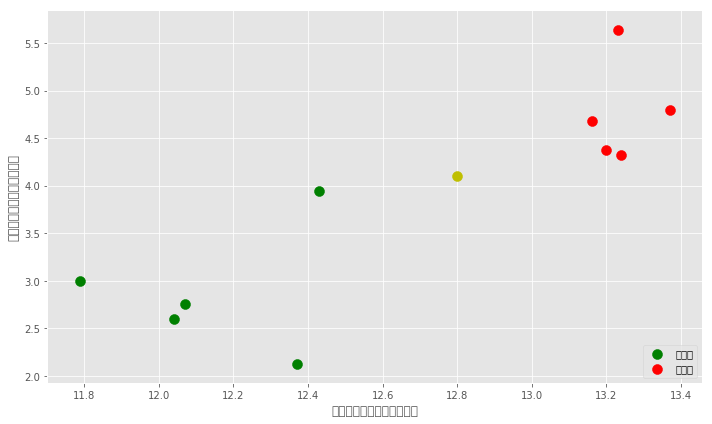

In [11]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
plt.figure(figsize=(10,6)) 

plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],s=100,color='g',label='赤霞珠') 
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1],s=100,color='r',label='黑皮诺') 
plt.scatter(x_test[0],x_test[1],s=100,color='y') # x_test

plt.xlabel('酒精浓度')
plt.ylabel('颜色深度')
plt.legend(loc='lower right')

plt.tight_layout()
plt.savefig('葡萄酒样本.png')

接着，根据欧拉公式计算黄色的新样本点到每个样本点的距离：

In [12]:
from math import sqrt
distances = [sqrt(np.sum((x - x_test)**2)) for x in X_train] # 列表推导式
distances

[1.5989058759038943,
 0.4882622246293471,
 0.6826419266350403,
 0.9027181176867997,
 0.49193495504995355,
 1.5259423318068084,
 0.4031128874149283,
 1.4933519344079622,
 2.026153992173349,
 1.6815469068687918]

这样就计算出了黄色点到每个样本点的距离，接着找出最近的 3 个点，可以使用 np.argsort 函数返回样本点的索引位置：

In [13]:
sort = np.argsort(distances)
sort

array([6, 1, 4, 2, 3, 7, 5, 0, 9, 8])

通过这个索引值就能在 y_train 中找到对应酒的类别，再统计出排名前 3 的就行了：

In [14]:
K = 3 
topK = [y_train[i] for i in sort[:K]]
topK

[1, 0, 0]

可以看到距离黄色点最近的 3 个点都是绿色的赤霞珠，与刚才肉眼观测的结果一致。

到这里，距离输出黄色点所属类别只剩最后一步，使用 Counter 函数统计返回类别值即可：

In [15]:
from collections import Counter
votes = Counter(topK)
votes

Counter({0: 2, 1: 1})

In [16]:
predict_y = votes.most_common(1)[0][0]
predict_y

0

In [17]:
from sklearn.neighbors import KNeighborsClassifier 
kNN_classifier = KNeighborsClassifier(n_neighbors=3)
kNN_classifier.fit(X_train,y_train )
x_test = x_test.reshape(1,-1)
kNN_classifier.predict(x_test)[0]

0